In [1]:
import pandas as pd
import glob
from collections import defaultdict
import numpy as np
import json


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import seaborn as sns
sns.set(style='whitegrid', palette='muted')

from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor, as_completed

In [2]:
!mkdir -p plots

In [3]:
results_dir = "results/1648838189"
result_name = "5000-ce"

In [4]:
# Parameters
result_name = "1000-ce"
results_dir = "results/1648829770"


In [5]:
forecast_files = glob.glob(f"{results_dir}/forecast.*.jsonl")

key_to_timestamps = defaultdict(list)
key_to_last_seqnos = defaultdict(list)
key_to_last_seqno_to_forecast = defaultdict(dict)
for path in tqdm(forecast_files):
    with open(path) as f:
        for line in f:
            loaded = json.loads(line)
            key_id = str(loaded["key_id"])
            key_to_timestamps[key_id].append(loaded["processing_time"])
            key_to_last_seqnos[key_id].append(loaded["last_seqno"])
            key_to_last_seqno_to_forecast[key_id][loaded["last_seqno"]] = loaded["forecast"]


  0%|                                                                       | 0/4 [00:00<?, ?it/s]

 25%|███████████████▊                                               | 1/4 [00:01<00:03,  1.10s/it]

 50%|███████████████████████████████▌                               | 2/4 [00:02<00:02,  1.12s/it]

 75%|███████████████████████████████████████████████▎               | 3/4 [00:03<00:01,  1.13s/it]

100%|███████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.13s/it]

100%|███████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.13s/it]

In [6]:
source_files = glob.glob(f"{results_dir}/source.*.jsonl")
key_to_source_series = defaultdict(list)
key_to_source_timestamps = defaultdict(list)
key_to_source_seqno = defaultdict(list)
for path in source_files:
    with open(path) as f:
        for line in tqdm(f):
            loaded = json.loads(line)
            for entry in loaded:
                key_id = str(entry["key_id"])
                key_to_source_series[key_id].append(entry["value"])
                key_to_source_timestamps[key_id].append(entry["ingest_time"])
                key_to_source_seqno[key_id].append(entry["seq_no"])


0it [00:00, ?it/s]

1it [00:00,  5.31it/s]

70it [00:00, 300.17it/s]

138it [00:00, 443.72it/s]

205it [00:00, 521.15it/s]

271it [00:00, 566.69it/s]

336it [00:00, 591.70it/s]

400it [00:00, 606.87it/s]

463it [00:00, 613.96it/s]

527it [00:00, 619.03it/s]

590it [00:01, 621.12it/s]

653it [00:01, 621.37it/s]

716it [00:01, 589.34it/s]

777it [00:01, 594.49it/s]

840it [00:01, 602.19it/s]

901it [00:01, 602.94it/s]

964it [00:01, 609.31it/s]

1026it [00:01, 607.82it/s]

1089it [00:01, 611.85it/s]

1151it [00:02, 607.09it/s]

1213it [00:02, 610.64it/s]

1275it [00:02, 607.92it/s]

1337it [00:02, 610.88it/s]

1400it [00:02, 614.17it/s]

1462it [00:02, 606.35it/s]

1525it [00:02, 613.14it/s]

1588it [00:02, 616.85it/s]

1650it [00:02, 609.89it/s]

1713it [00:02, 613.87it/s]

1776it [00:03, 616.98it/s]

1838it [00:03, 588.98it/s]

1900it [00:03, 595.89it/s]

1963it [00:03, 603.93it/s]

2026it [00:03, 608.79it/s]

2088it [00:03, 597.79it/s]

2151it [00:03, 605.64it/s]

2214it [00:03, 610.48it/s]

2277it [00:03, 615.40it/s]

2339it [00:03, 603.84it/s]

2401it [00:04, 608.08it/s]

2464it [00:04, 614.46it/s]

2528it [00:04, 620.91it/s]

2592it [00:04, 624.49it/s]

2655it [00:04, 609.60it/s]

2719it [00:04, 616.21it/s]

2782it [00:04, 619.91it/s]

2845it [00:04, 618.14it/s]

2909it [00:04, 622.18it/s]

2972it [00:05, 605.10it/s]

3035it [00:05, 610.42it/s]

3098it [00:05, 614.32it/s]

3161it [00:05, 616.78it/s]

3224it [00:05, 619.00it/s]

3286it [00:05, 617.79it/s]

3348it [00:05, 597.87it/s]

3408it [00:05, 597.01it/s]

3469it [00:05, 600.79it/s]

3531it [00:05, 605.75it/s]

3593it [00:06, 609.95it/s]

3656it [00:06, 613.25it/s]

3718it [00:06, 614.08it/s]

3780it [00:06, 593.58it/s]

3842it [00:06, 598.64it/s]

3904it [00:06, 602.70it/s]

3966it [00:06, 605.03it/s]

4028it [00:06, 606.59it/s]

4090it [00:06, 608.94it/s]

4152it [00:06, 609.79it/s]

4214it [00:07, 611.52it/s]

4276it [00:07, 586.39it/s]

4338it [00:07, 594.30it/s]

4398it [00:07, 595.53it/s]

4459it [00:07, 597.86it/s]

4520it [00:07, 598.52it/s]

4582it [00:07, 602.21it/s]

4644it [00:07, 604.46it/s]

4705it [00:07, 602.18it/s]

4767it [00:07, 604.59it/s]

4828it [00:08, 578.31it/s]

4890it [00:08, 587.79it/s]

4952it [00:08, 596.29it/s]

5014it [00:08, 601.69it/s]

5076it [00:08, 604.47it/s]

5138it [00:08, 607.73it/s]

5201it [00:08, 612.03it/s]

5264it [00:08, 616.20it/s]

5327it [00:08, 617.36it/s]

5389it [00:09, 588.10it/s]

5451it [00:09, 596.12it/s]

5514it [00:09, 604.74it/s]

5577it [00:09, 611.01it/s]

5640it [00:09, 613.90it/s]

5702it [00:09, 614.59it/s]

5764it [00:09, 614.08it/s]

5826it [00:09, 614.47it/s]

5888it [00:09, 614.38it/s]

5950it [00:09, 615.62it/s]

6012it [00:10, 615.37it/s]

6074it [00:10, 580.43it/s]

6136it [00:10, 591.41it/s]

6199it [00:10, 600.18it/s]

6261it [00:10, 605.11it/s]

6323it [00:10, 608.41it/s]

6385it [00:10, 609.21it/s]

6447it [00:10, 610.40it/s]

6509it [00:10, 610.43it/s]

6571it [00:10, 608.82it/s]

6632it [00:11, 608.96it/s]

6694it [00:11, 610.68it/s]

6756it [00:11, 603.85it/s]

6817it [00:11, 557.19it/s]

6874it [00:11, 540.43it/s]

6934it [00:11, 556.49it/s]

6994it [00:11, 568.78it/s]

7055it [00:11, 578.62it/s]

7115it [00:11, 584.69it/s]

7176it [00:12, 589.56it/s]

7236it [00:12, 592.46it/s]

7297it [00:12, 596.13it/s]

7358it [00:12, 598.59it/s]

7419it [00:12, 601.13it/s]

7480it [00:12, 600.48it/s]

7541it [00:12, 603.21it/s]

7602it [00:12, 604.50it/s]

7663it [00:12, 605.20it/s]

7724it [00:12, 555.05it/s]

7785it [00:13, 567.93it/s]

7846it [00:13, 579.08it/s]

7905it [00:13, 576.30it/s]

7966it [00:13, 583.69it/s]

8026it [00:13, 587.26it/s]

8087it [00:13, 591.80it/s]

8148it [00:13, 595.70it/s]

8210it [00:13, 600.19it/s]

8271it [00:13, 601.72it/s]

8333it [00:13, 605.00it/s]

8395it [00:14, 606.59it/s]

8457it [00:14, 609.49it/s]

8519it [00:14, 611.29it/s]

8581it [00:14, 612.24it/s]

8639it [00:14, 596.99it/s]

In [7]:
num_forecasts = pd.DataFrame([
    {"key": k, "num_forecasts": len(v)} for k, v in key_to_last_seqnos.items()
])
num_forecasts.describe()

,num_forecasts
count,997.000000
mean,1.390171
std,0.887906
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,12.000000


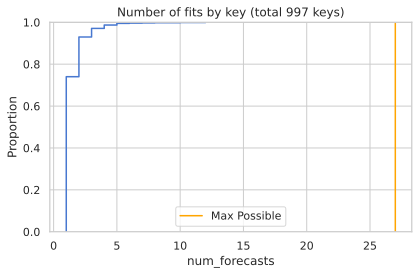

In [8]:
sns.ecdfplot(num_forecasts["num_forecasts"])
plt.title(f"Number of fits by key (total {len(num_forecasts)} keys)")
plt.axvline(27, color="orange", label="Max Possible")
plt.legend()
plt.tight_layout()
plt.savefig(f"plots/{result_name}-nfits.pdf", dpi=300)

In [9]:
num_forecasts.to_csv(f"plots/{result_name}-nfits.csv", index=None)

In [10]:
def compute_key(key):
    pred_df = (
        pd.DataFrame(
            {
                "timestamp": key_to_timestamps[key],
                "last_seqno": key_to_last_seqnos[key],
            }
        )
        .sort_values("timestamp")
        .set_index("timestamp")
    )
    true_df = (
        pd.DataFrame(
            {
                "timestamp": key_to_source_timestamps[key],
                "avg_cpu": key_to_source_series[key],
                "seq_no": key_to_source_seqno[key],
            }
        )
        .sort_values("timestamp")
        .set_index("timestamp")
    )

    merged = pd.merge_asof(
        left=true_df, right=pred_df, on="timestamp", direction="backward"
    )

    forecast = key_to_last_seqno_to_forecast[key]
    frame = pd.DataFrame(forecast)
    frame = (
        frame.T.reset_index()
        .melt("index")
        .rename(columns={"variable": "seq_delta", "index": "last_seqno"})
    )

    m = merged.dropna().reset_index(drop=True)
    m.loc[:, "seq_delta"] = (m["seq_no"] - m["last_seqno"]).astype(int)
    final = m.merge(frame, how="left", on=["last_seqno", "seq_delta"])

    mse_per_key_per_s = final.groupby(final["timestamp"].astype(int)).apply(
        lambda d: pd.Series(
            {"mse": ((d["avg_cpu"] - d["value"]) ** 2).mean(), "count": len(d)}
        )
    )
    mse_per_key_per_s["key"] = key
    return mse_per_key_per_s

with ProcessPoolExecutor() as executor:
    futs = executor.map(compute_key, key_to_timestamps.keys())
    mses = list(futs)

In [11]:
# we are dropping some keys here :sigh:
# need to figure out how to handle a key that's never fitted
# final length 4965 for 5000
all_mse = pd.concat([f.reset_index() for f in mses if len(f)])

In [12]:
all_mse.to_parquet(f"plots/{result_name}-all_mse.pq", index=None)

In [13]:
mse_by_timestamp = all_mse.groupby("timestamp").apply(
    lambda d: (d["mse"]*d["count"]).sum()/(d["count"].sum())
)

In [14]:
mse_by_timestamp.index = mse_by_timestamp.index-mse_by_timestamp.index.min()

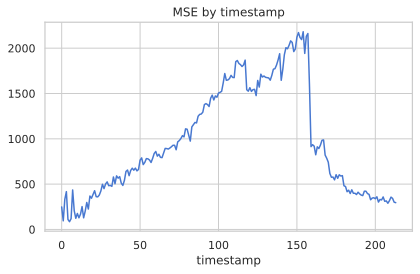

In [15]:
mse_by_timestamp.plot()
plt.title("MSE by timestamp")
plt.tight_layout()
plt.savefig(f"plots/{result_name}-mse-time.pdf", dpi=300)
mse_by_timestamp.to_csv(f"plots/{result_name}-mse-time.csv", index=True)